In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)

---  
# the beak depth of G. scandens on Daphne Major in 1975 and in 2012  

In [2]:
df1975 = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv')
df2012 = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv')
# take only adults
df1975 = df1975[(df1975['Beak length, mm'] >= 12.8) & (df1975['Beak depth, mm'] >= 7.9)]
df2012 = df2012[(df2012['blength'] >= 11.4) & (df2012['bdepth'] >= 7.7)]

In [3]:
display(df1975)
display(df1975.describe())

,band,species,"Beak length, mm","Beak depth, mm"
316,302,scandens,13.90,8.40
317,304,scandens,14.00,8.80
318,306,scandens,12.90,8.40
319,310,scandens,13.50,8.00
320,317,scandens,12.90,7.90
...,...,...,...,...
398,20225,scandens,14.55,9.45
399,20252,scandens,14.05,9.05
400,20255,scandens,14.45,8.75
401,20266,scandens,15.05,9.45


,band,"Beak length, mm","Beak depth, mm"
count,87.000000,87.000000,87.000000
mean,2985.264368,14.120920,8.960000
std,6309.578017,0.754789,0.566595
min,302.000000,12.800000,7.900000
25%,405.000000,13.500000,8.550000
50%,570.000000,14.000000,9.000000
75%,917.000000,14.740000,9.250000
max,20279.000000,15.940000,10.400000


In [4]:
display(df2012)
display(df1975.describe())

,band,species,blength,bdepth
1,19028,fortis,12.5,8.9
15,19203,fortis,11.9,10.0
24,19288,fortis,11.5,9.1
43,19604,fortis,11.7,9.0
47,19642,fortis,12.2,10.0
...,...,...,...,...
243,21295,scandens,14.2,9.3
244,21297,scandens,13.0,9.8
245,21340,scandens,14.6,8.9
246,21342,scandens,13.1,9.8


,band,"Beak length, mm","Beak depth, mm"
count,87.000000,87.000000,87.000000
mean,2985.264368,14.120920,8.960000
std,6309.578017,0.754789,0.566595
min,302.000000,12.800000,7.900000
25%,405.000000,13.500000,8.550000
50%,570.000000,14.000000,9.000000
75%,917.000000,14.740000,9.250000
max,20279.000000,15.940000,10.400000


In [5]:
df1975.drop(['band', 'species'], axis=1, inplace=True)
df1975['year'] = 1975
df1975.head()

,"Beak length, mm","Beak depth, mm",year
316,13.9,8.4,1975
317,14.0,8.8,1975
318,12.9,8.4,1975
319,13.5,8.0,1975
320,12.9,7.9,1975


In [6]:
df2012.drop(['band', 'species'], axis=1, inplace=True)
df2012['year'] = 2012
df2012.head()

,blength,bdepth,year
1,12.5,8.9,2012
15,11.9,10.0,2012
24,11.5,9.1,2012
43,11.7,9.0,2012
47,12.2,10.0,2012


In [7]:
df1975.columns = df2012.columns
df = pd.concat([df1975, df2012], ignore_index=True)

In [8]:
df

,blength,bdepth,year
0,13.9,8.4,1975
1,14.0,8.8,1975
2,12.9,8.4,1975
3,13.5,8.0,1975
4,12.9,7.9,1975
...,...,...,...
226,14.2,9.3,2012
227,13.0,9.8,2012
228,14.6,8.9,2012
229,13.1,9.8,2012


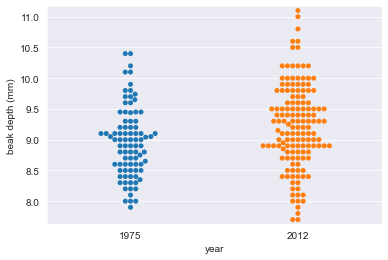

In [9]:
sns.set_style(style='darkgrid')
sns.swarmplot(x='year', y='bdepth', data=df)
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.margins(0.02)

### It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

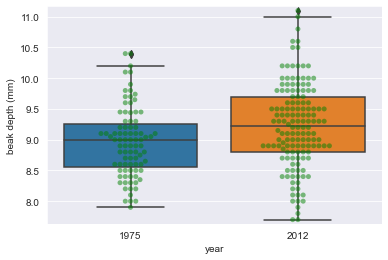

In [10]:
sns.boxplot(x='year', y='bdepth', data=df)
sns.swarmplot(x='year', y='bdepth', data=df, color='green', alpha=0.5)
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.margins(0.02)

### Above we can see that the suspicions have been correct

In [11]:
def ecdf(data, by):
    '''Prepers data for ECDF plot'''

    x = data.sort_values(by=by).reset_index()
    y = np.arange(1, data.shape[0]+1) / data.shape[0]
    return x[by].values, y

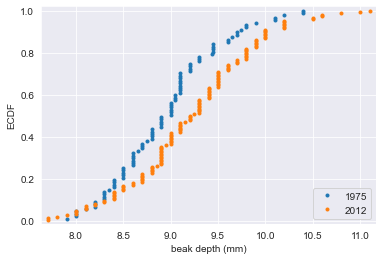

In [12]:
x_1975, y_1975 = ecdf(df[df.year == 1975], 'bdepth')
x_2012, y_2012 = ecdf(df[df.year == 2012], 'bdepth')

plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.margins(0.02)

plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

### The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.
</br>

---
## Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [13]:
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of 1D data.'''

    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates.'''

    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates


In [14]:
bd_2012 = df[df.year == 2012].bdepth.values
bd_1975 = df[df.year == 1975].bdepth.values
mean_diff = bd_2012.mean() - bd_1975.mean()

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5,97.5])

print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.26569444444444557 mm
95% confidence interval = [0.09815134 0.42232381] mm


# Hypothesis: Are beaks deeper in 2012?  
#### The ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

In [15]:
# Compute mean of combined data set
combined_mean = df.bdepth.mean()

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

print('p =', p)

p = 0.0004


#### We get a p-value of 0.0004, which suggests that there is a statistically significant difference. Above we got a difference of 0.27 mm between the means.</br>  
#### Changing by 0.27 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 300 years.

---
# EDA of beak length and depth

In [16]:
bl_2012 = df[df.year == 2012].blength.values
bl_1975 = df[df.year == 1975].blength.values

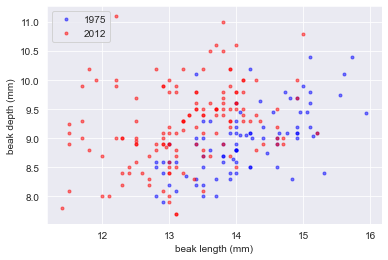

In [17]:
plt.plot(bl_1975, bd_1975, marker='.', linestyle='None', color='blue', alpha=0.5)
plt.plot(bl_2012, bd_2012, marker='.', linestyle='None', color='red', alpha=0.5)
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

#### From the scatter plot above we can observe that beaks got deeper (the red points are higher up in the y-direction) but not very longer.  
#### If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

# Linear Regression

In [18]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    inds = np.arange(0, len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [19]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5,97.5])

print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33641947 0.59555183]
1975: intercept = 2.390875236584226 conf int = [0.55765379 4.20347468]
2012: slope = 0.2571401181586161 conf int = [0.13130698 0.40314904]
2012: intercept = 5.816141476329747 conf int = [3.85086629 7.54863   ]


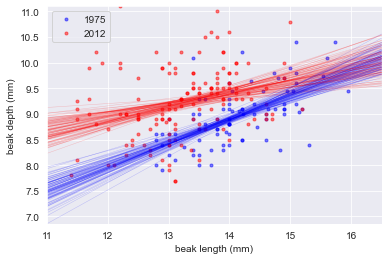

In [44]:
plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', c='b', alpha=0.5)
plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', c='r', alpha=0.5)

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')
plt.margins(0)
x = np.array([11, 16.5])

for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, c='b')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i], linewidth=0.5, alpha=0.2, c='r')

### The linear regressions showes interesting information about the beak geometry. From 1975 to 2012 the slope has changed, suggesting that for every millimeter gained in beak length in 1975, the birds gained about half a millimeter in depth and one thrid in 2012.

## However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth.

In [21]:
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5,99.5])

print('1975: mean ratio =', np.mean(ratio_1975), 'conf int =', conf_int_1975)
print('2012: mean ratio =', np.mean(ratio_2012), 'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55659424 1.60005593]
2012: mean ratio = 1.4428956042509318 conf int = [1.4184379  1.46642205]


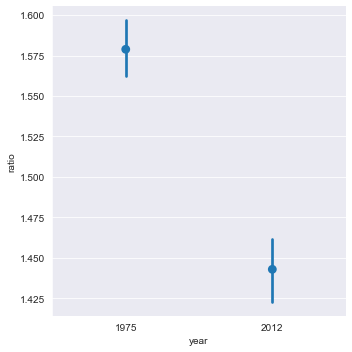

In [33]:
df['ratio'] = df.blength / df.bdepth
sns.catplot(x='year', y='ratio', data=df, kind='point', join=False)

### It is impossible to say if this is a real effect or just due to noise without computing a p-value.

In [42]:
# Compute mean of combined data set
combined_ratio_mean = np.mean(np.concatenate((ratio_1975, ratio_2012)))

# Shift the samples
ratio_1975_shifted = ratio_1975 - np.mean(ratio_1975) + combined_ratio_mean
ratio_2012_shifted = ratio_2012 - np.mean(ratio_2012) + combined_ratio_mean

# Get bootstrap replicates of shifted data sets
ratio_repl_1975 = draw_bs_reps(ratio_1975_shifted, np.mean, 100000)
ratio_repl_2012 = draw_bs_reps(ratio_2012_shifted, np.mean, 100000)

# Compute replicates of difference of means
ratio_diff_repl = ratio_repl_2012 - ratio_repl_1975

# Compute the p-value
p = np.sum(ratio_diff_repl <= (ratio_2012.mean() - ratio_1975.mean())) / len(ratio_diff_repl)

print('p =', p)

p = 0.0


### P-value is very small therefore the above observation is correct. The ratio of beak length to beak depth has decreased since 1975.